In [1]:
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from EventDisplay import EventDisplay
import matplotlib.colors as colors

#1) make an instance of the event display class
eventDisplay = EventDisplay() 

#2) start by loading in the CSV file for how the mPMTs are mapped to 2d event display
#unwraps based on the mPMT slot ID 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

#mask out mPMT slots - newer WCSim doesn't have these mPMTs loaded  
#WCTE slot numbering
# eventDisplay.mask_mPMTs([45,77,79,27,32,85,91,99,12,14,16,18])
#WCSim container numbering
# eventDisplay.mask_mPMTs([20,73,38,49,55,65,67,33,71,92,101,95])

#3) load the WCSim mapping tube no to slot number
#for WCSim using the numpy output we need the mapping between the tube_number in WCSim and the slot and mPMT number in the detector
#this can be obtained from the geofile that WCSim produces 
#This changes if the CDS is implemented or not
eventDisplay.load_wcsim_tubeno_mapping("geofile_WCTE.txt")

#4) debug by plotting some geometry files 
#data = np.load("/eos/home-j/jrimmer/sim_work_dir/WCSim/300mu_500MeV_airgap.npz", allow_pickle=True)
#data = np.load("/eos/home-j/jrimmer/sim_work_dir/WCSim/wcsim.npz", allow_pickle=True)


#position = data["position"]

In [2]:
delam_slots = np.sort([78,46,80,65,49,72,76,90,94,98,105,1,7,5])
delam_slots

array([  1,   5,   7,  46,  49,  65,  72,  76,  78,  80,  90,  94,  98,
       105])

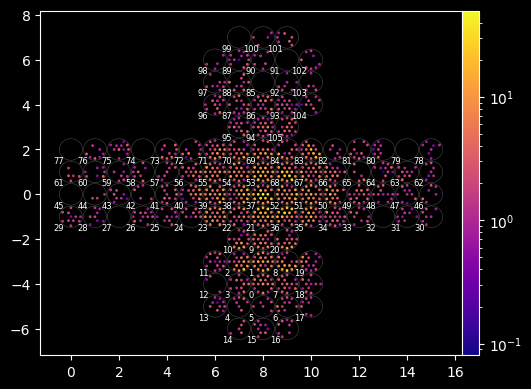

In [10]:
#load the data to plot
energy = 400 # MeV
folder_g1 = '/eos/user/j/jrimmer/simulation/sim_data/gamma/wcsim_wCDS_gamma_Beam_'+str(energy)+'MeV_0cm_0000.npz'
data = np.load(folder_g1, allow_pickle=True)
#data = np.load("/eos/home-j/jrimmer/sim_work_dir/WCSim/300mu_1GeV_airgap.npz", allow_pickle=True)
#data = np.load("/eos/home-j/jrimmer/simulation/sim_data/gamma/wcsim_wCDS_gamma_Beam_1000MeV_0cm_0000.npz", allow_pickle=True)
#data = np.load("/eos/user/j/jrimmer/simulation/wcsim.npz", allow_pickle=True)
#data = np.load("/eos/home-j/jrimmer/sim_work_dir/WCSim/wcsim.npz", allow_pickle=True)

eventID =3
tube_no = data["digi_hit_pmt"][eventID]+1

data_to_plot = data["digi_hit_charge"][eventID]


pmt = np.asarray(data["digi_hit_pmt"][eventID])
charge = np.asarray(data["digi_hit_charge"][eventID])

#print(np.sort(tube_no))
#mask = pmt < 1843

#tube_no = (pmt[mask] + 1).tolist()
#data_to_plot = charge[mask].tolist()

#tube_no = [1587,1588,1589,1590,1591]
#data_to_plot = [50,50,50,50,50]

# tube_no = data["tube_no"]
# position = data["position"]

#map from the tube number to the mPMT slot and position number
mPMT_id, PMT_pos = eventDisplay.map_wcsim_tubeno_to_slot_pmt_id(tube_no)
data_to_plot = eventDisplay.process_data(mPMT_id,PMT_pos,data_to_plot)
x = eventDisplay.plotEventDisplay(data_to_plot,color_norm=colors.Normalize(), style= "dark_background")

#plt.savefig("Event_display_ev"+str(eventID)+".png")
#plt.show()
#eventDisplay.label_mPMTs(np.arange(0,106))

    

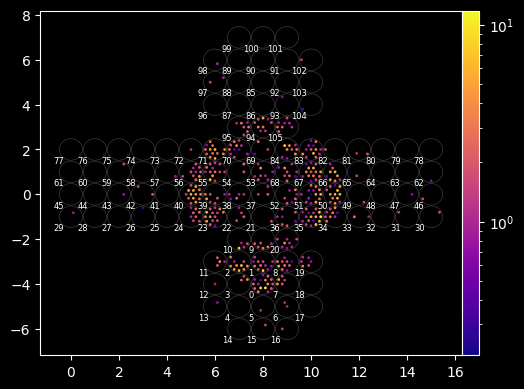

In [11]:
#load the data to plot
folder_g2 = '/eos/user/j/jrimmer/sim_work_dir/WCSim/100mu-_200MeV_noairgap.npz'
data = np.load(folder_g2, allow_pickle=True)

eventID =0

mask = data["digi_hit_time"][eventID] < 18

tube_no = data["digi_hit_pmt"][eventID][mask]+1

data_to_plot = data["digi_hit_charge"][eventID][mask]


pmt = np.asarray(data["digi_hit_pmt"][eventID][mask])
charge = np.asarray(data["digi_hit_charge"][eventID][mask])



#map from the tube number to the mPMT slot and position number
mPMT_id, PMT_pos = eventDisplay.map_wcsim_tubeno_to_slot_pmt_id(tube_no)
data_to_plot = eventDisplay.process_data(mPMT_id,PMT_pos,data_to_plot)
x = eventDisplay.plotEventDisplay(data_to_plot,color_norm=colors.Normalize(), style= "dark_background")


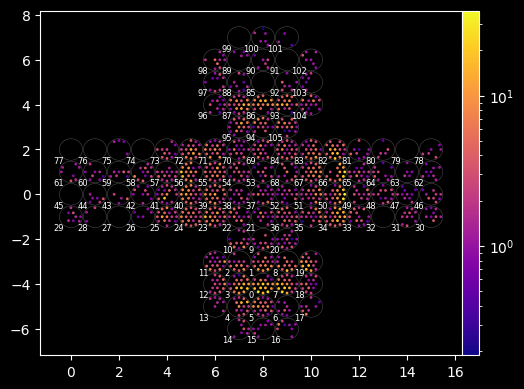

In [5]:
#load the data to plot
folder_g3 = '/eos/user/j/jrimmer/sim_work_dir/WCSim/wcsim.npz'
data = np.load(folder_g3, allow_pickle=True)

eventID =0
tube_no = data["digi_hit_pmt"][eventID]+1

data_to_plot = data["digi_hit_charge"][eventID]


pmt = np.asarray(data["digi_hit_pmt"][eventID])
charge = np.asarray(data["digi_hit_charge"][eventID])



#map from the tube number to the mPMT slot and position number
mPMT_id, PMT_pos = eventDisplay.map_wcsim_tubeno_to_slot_pmt_id(tube_no)
data_to_plot = eventDisplay.process_data(mPMT_id,PMT_pos,data_to_plot)
x = eventDisplay.plotEventDisplay(data_to_plot,color_norm=colors.Normalize(), style= "dark_background")